<a href="https://colab.research.google.com/github/kusawokoshitemori/MachineLearningPractice/blob/main/MachineLearningPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


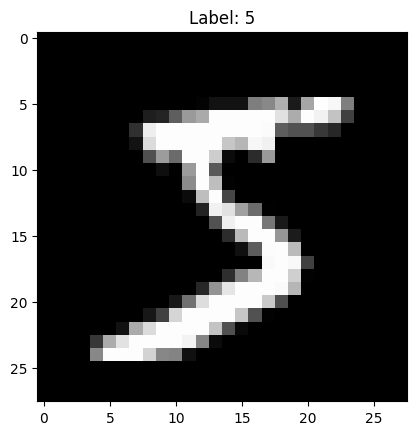

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# MNISTデータを取得
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 画像を表示
plt.imshow(train_images[0], cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [3]:
# 画像データを0〜1に正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Normalized data:", train_images[0])


Normalized data: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8791 - loss: 0.4346 - val_accuracy: 0.9588 - val_loss: 0.1370
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9643 - loss: 0.1199 - val_accuracy: 0.9715 - val_loss: 0.0924
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9763 - loss: 0.0788 - val_accuracy: 0.9764 - val_loss: 0.0772
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9841 - loss: 0.0537 - val_accuracy: 0.9753 - val_loss: 0.0744
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy: 0.9769 - val_loss: 0.0714


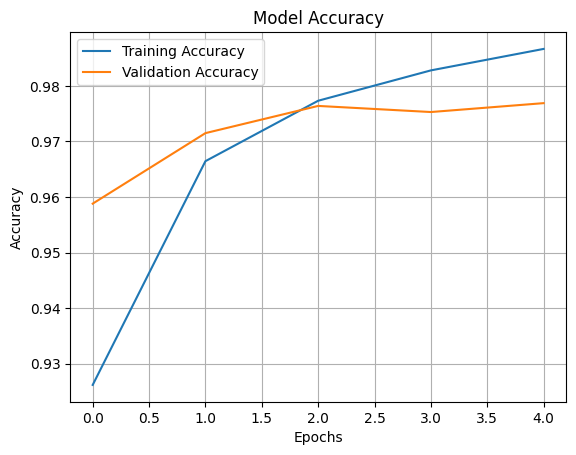

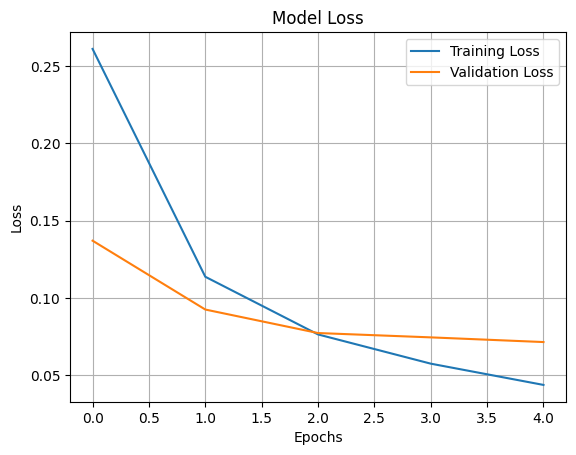

In [12]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# モデルの作成
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # 28x28の画像を1次元に変換
    layers.Dense(128, activation='relu'),   # 隠れ層（128ノード、ReLU活性化関数）
    layers.Dense(10, activation='softmax')  # 出力層（10クラス分類、Softmax）
])

# モデルのコンパイル
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの学習（学習履歴を保存）
hist = model.fit(train_images, train_labels,
                 epochs=5,
                 validation_data=(test_images, test_labels))  # 学習の実行（validation_data 追加）

# === 学習の可視化 ===
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 損失の推移をプロット
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0828
Test accuracy: 0.9768999814987183
